# 🛠 Exercises

## 1. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it, and make a prediction on it using a trained model.

In [1]:
# import libraries
import os
import random
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf

In [2]:
# download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip data
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2023-12-04 13:20:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.7MB/s    in 8.5s    

2023-12-04 13:20:32 (19.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# set directories
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [4]:
# create data loaders from the dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 label_mode='categorical',
                                                                 image_size=(224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode='categorical',
                                                                image_size=(224, 224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
# create a simple model from scratch
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(len(train_data.class_names), activation = 'softmax')
])

# compile a model
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# train a model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        validation_steps=int(len(test_data) * 0.5))

Epoch 1/10
24/24 [==============================] - 21s 316ms/step - loss: 1638.4863 - accuracy: 0.1120 - val_loss: 2.3353 - val_accuracy: 0.1122
Epoch 2/10
24/24 [==============================] - 5s 180ms/step - loss: 1.8173 - accuracy: 0.4267 - val_loss: 2.9115 - val_accuracy: 0.1058
Epoch 3/10
24/24 [==============================] - 7s 289ms/step - loss: 0.7729 - accuracy: 0.7920 - val_loss: 4.2024 - val_accuracy: 0.1218
Epoch 4/10
24/24 [==============================] - 4s 166ms/step - loss: 0.3690 - accuracy: 0.9053 - val_loss: 5.3774 - val_accuracy: 0.1282
Epoch 5/10
24/24 [==============================] - 5s 179ms/step - loss: 0.2359 - accuracy: 0.9573 - val_loss: 9.8809 - val_accuracy: 0.1218
Epoch 6/10
24/24 [==============================] - 6s 212ms/step - loss: 0.2809 - accuracy: 0.9533 - val_loss: 7.8886 - val_accuracy: 0.1066
Epoch 7/10
24/24 [==============================] - 5s 177ms/step - loss: 0.1707 - accuracy: 0.9720 - val_loss: 8.6898 - val_accuracy: 0.1162
Ep

In [6]:
# evaluate a model
model_1.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 13.5436 - accuracy: 0.1264


[13.543573379516602, 0.12639999389648438]

In [34]:
# function to plot curves
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'ob', label='train acc')
    plt.plot(epochs, val_acc, 'og', label='val acc')
    plt.legend()
    plt.xlabel('Epochs')
    plt.title('Accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'vb', label='train loss')
    plt.plot(epochs, val_loss, '^g', label='val loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.title('Loss')
    plt.show()

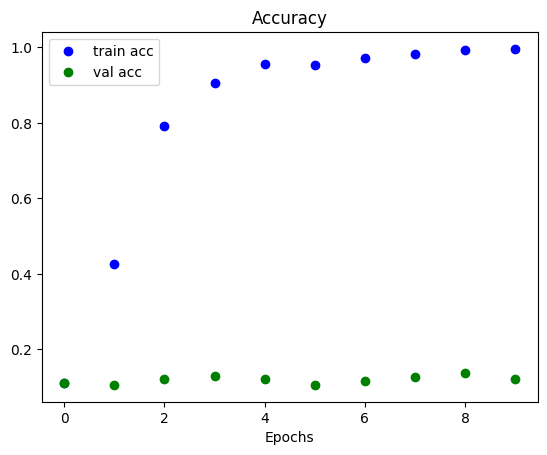

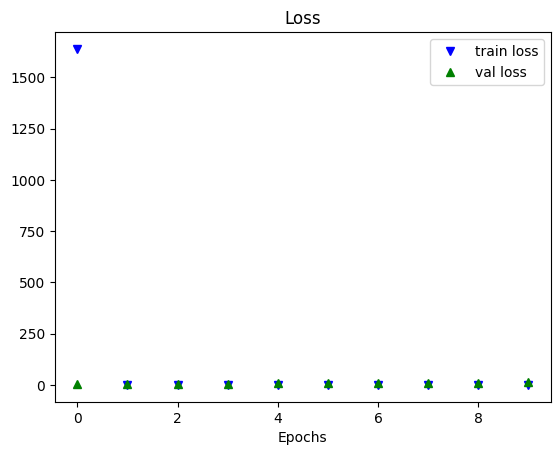

In [35]:
# plot curves
plot_curves(history_1)

In [7]:
# function to visualize a random image from the dataset
def plot_images(train_dir, test_dir, train_data, model):
    # set an image path
    class_list = train_data.class_names
    target_class = random.choice(class_list)
    target_dir = random.choice([train_dir, test_dir])
    chosen_path = target_dir + target_class
    random_image = random.choice(os.listdir(chosen_path))
    random_image_path = os.path.join(chosen_path, random_image)

    # prediction
    random_data = Image.open(random_image_path)
    random_data = np.asarray(random_data.resize((224, 224)))
    pred_prob = model.predict(np.expand_dims(random_data, axis = 0)) # add a batch_size
    pred_class = class_list[pred_prob.argmax(axis = 1)[0]]

    # image
    img = mpimg.imread(random_image_path)
    plt.imshow(img)
    plt.title(f"Image class: {target_class} | Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 135ms/step


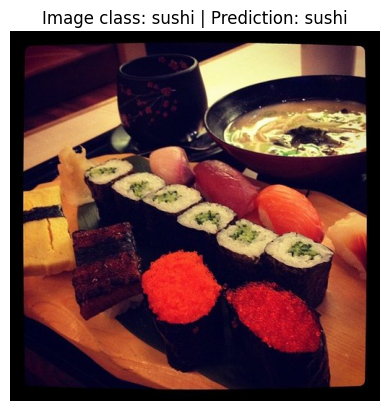

In [8]:
plot_images(train_dir, test_dir, train_data, model_1)

## 2. Use feature extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.efficientnet_v2.EfficientNetV2B0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to the file.

In [9]:
# get the pre-trained base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# change trainable attribute to False
base_model.trainable = False

24274472/24274472 [==============================] - 2s 0us/step


In [10]:
# create ModelCheckpoint callback
# set checkpoint path
checkpoint_path = "model_checkpoint_weights/checkpoint.ckpt"

# create a callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

In [11]:
# create data_augmentation seq layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
])

# create a model
inputs = tf.keras.Input(shape = (224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x, training = False) # set 'training = False' to refrain any variables from training
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs = inputs, outputs = outputs)

# compile a model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# train a model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        validation_steps=int(len(test_data) * 0.5),
                        callbacks=[checkpoint_callback])

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.9919 - accuracy: 0.3467
Epoch 1: val_loss improved from inf to 1.51191, saving model to model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 30s 859ms/step - loss: 1.9919 - accuracy: 0.3467 - val_loss: 1.5119 - val_accuracy: 0.6402
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.3838 - accuracy: 0.6680
Epoch 2: val_loss improved from 1.51191 to 1.04904, saving model to model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 18s 690ms/step - loss: 1.3838 - accuracy: 0.6680 - val_loss: 1.0490 - val_accuracy: 0.7580
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.1135 - accuracy: 0.7320
Epoch 3: val_loss improved from 1.04904 to 0.84749, saving model to model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 14s 551ms/step - loss: 1.1135 - accuracy: 0.7320 - val_loss: 0.8475 - val_accuracy: 0.7901

In [ ]:
# evaluate the model
model_2.evaluate(test_data)

In [ ]:
# plot curves


## 3. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [12]:
# summary of a model
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.

In [ ]:
# check model_2 layers training status
for layer_num, layer in enumerate(model_2.layers):
    print(layer_num, layer.name, layer.trainable)

In [13]:
# get the base_model from the model_2
model_2_base = model_2.layers[2]

# turn on the base_model trainable attribute
base_model.trainable = True

# set the last 20 layers to be trainable
for layer in base_model.layers[:-20]:
    layer.trainable = False

# check base_model layers training status
for layer_num, layer in enumerate(base_model.layers):
    print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [14]:
# check model_2 layers training status
for layer_num, layer in enumerate(model_2.layers):
    print(layer_num, layer.name, layer.trainable)

0 input_2 True
1 sequential_1 True
2 efficientnetv2-b0 True
3 global_average_pooling2d True
4 dense_2 True


In [16]:
# re-check with the model summary
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 830650 (3.

In [17]:
# re-compile the model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# fine-tune the model
history_3 = model_2.fit(train_data,
                        epochs=20,
                        initial_epoch=10,
                        validation_data=test_data,
                        validation_steps=int(len(test_data) * 0.5),
                        callbacks=[checkpoint_callback])

Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.5945 - accuracy: 0.8080
Epoch 11: val_loss improved from 0.50058 to 0.41132, saving model to model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 25s 621ms/step - loss: 0.5945 - accuracy: 0.8080 - val_loss: 0.4113 - val_accuracy: 0.8646
Epoch 12/20
24/24 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.9040
Epoch 12: val_loss did not improve from 0.41132
24/24 [==============================] - 14s 576ms/step - loss: 0.3672 - accuracy: 0.9040 - val_loss: 0.4566 - val_accuracy: 0.8614
Epoch 13/20
24/24 [==============================] - ETA: 0s - loss: 0.2666 - accuracy: 0.9187
Epoch 13: val_loss did not improve from 0.41132
24/24 [==============================] - 19s 772ms/step - loss: 0.2666 - accuracy: 0.9187 - val_loss: 0.4342 - val_accuracy: 0.8598
Epoch 14/20
24/24 [==============================] - ETA: 0s - loss: 0.1963 - accuracy: 0.9493
Epoch 14: val_loss

In [ ]:
# evaluate a model
model_2.evaluate(test_data)

In [ ]:
# plot curves

## 4. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [19]:
# turn on the base_model trainable attribute
base_model.trainable = True

# set the last 20 layers to be trainable
for layer in base_model.layers[:-30]:
    layer.trainable = False

# check base_model layers training status
for layer_num, layer in enumerate(base_model.layers):
    print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [20]:
# check model_2 layers
for layer_num, layer in enumerate(model_2.layers):
    print(layer_num, layer.name, layer.trainable)

0 input_2 True
1 sequential_1 True
2 efficientnetv2-b0 True
3 global_average_pooling2d True
4 dense_2 True


In [21]:
# check model summary
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 1176682 (4

In [ ]:
# re-compile the model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# train the model
history_4 = model_2.fit(train_data,
                        epochs=20,
                        initial_epoch=10,
                        validation_data=test_data,
                        validation_steps=int(len(test_data) * 0.5),
                        callbacks=[checkpoint_callback])

In [ ]:
# evaluate the model
model_2.evaluate(test_data)

In [ ]:
# plot curves

# 📖 Extra-curriculum

- Read the [documentation on data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) in TensorFlow.
- Read the [ULMFit paper](https://arxiv.org/abs/1801.06146) (technical) for an introduction to the concept of freezing and unfreezing different layers.
- Read up on learning rate scheduling (there's a [TensorFlow callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) for this), how could this influence our model training?
    - If you're training for longer, you probably want to reduce the learning rate as you go... the closer you get to the bottom of the hill, the smaller steps you want to take. Imagine it like finding a coin at the bottom of your couch. In the beginning your arm movements are going to be large and the closer you get, the smaller your movements become.